In [3]:
import os

# Define dataset roots
adjectives_root = "/kaggle/input/include-50-adjectives/kaggle/working/adjectives_data"
people_root = "/kaggle/input/include-50-people/"

def collect_class_folders(root):
    class_folders = set()
    for subset in os.listdir(root):
        subset_path = os.path.join(root, subset)
        if not os.path.isdir(subset_path):
            continue
        for category in os.listdir(subset_path):
            category_path = os.path.join(subset_path, category)
            if os.path.isdir(category_path):
                class_folders.update(os.listdir(category_path))
    return sorted(class_folders)

adjective_dirs = collect_class_folders(adjectives_root)
people_dirs = collect_class_folders(people_root)

print("📂 Adjective Folders:", adjective_dirs)
print("📂 People Folders:", people_dirs)
print(f"✅ Total Adjective Classes: {len(adjective_dirs)}")
print(f"✅ Total People Classes: {len(people_dirs)}")


📂 Adjective Folders: ['1. loud', '10. Mean', '11. rich', '12. poor', '13. thick', '14. thin', '15. expensive', '16. cheap', '17. flat', '18. curved', '19. male', '2. quiet', '20. female', '21. tight', '22. loose', '23. high', '24. low', '25. soft', '26. hard', '27. deep', '28. shallow', '29. clean', '3. happy', '30. dirty', '31. strong', '32. weak', '33. dead', '34. alive', '35. heavy', '36. light', '39. famous', '4. sad', '5. Beautiful', '6. Ugly', '7. Deaf', '78. long', '79. short', '8. Blind', '80. tall', '81. wide', '82. narrow', '83. big large', '84. small little', '85. slow', '86. fast', '87. hot', '88. cold', '89. warm', '9. Nice', '90. cool', '91. new', '92. old', '93. young', '94. good', '95. bad', '96. wet', '97. dry', '98. sick', '99. healthy']
📂 People Folders: ['58. Son', '59. Daughter', '60. Mother', '61. Father', '62. Parent', '63. Baby', '64. Man', '65. Woman', '66. Brother', '67. Sister', '68. Family', '69. Grandfather', '70. Grandmother', '71. Husband', '72. Wife', '7

In [4]:
import os
import shutil
from pathlib import Path

# Paths
original_people_root = "/kaggle/input/include-50-people"
output_root = "/kaggle/working/cleaned_people_data"
conflicting_numbers = {'78', '79', '80', '81', '82', '83'}  # Overlapping with adjectives

# Helper: Checks if folder starts with a conflicting number
def needs_renaming(folder_name):
    number = folder_name.split(".")[0].strip()
    return number in conflicting_numbers

# Step 1: Loop through People_1of5 to People_5of5
for subset in sorted(os.listdir(original_people_root)):
    subset_path = os.path.join(original_people_root, subset, "People")
    if not os.path.exists(subset_path): continue  # Skip if structure differs

    new_subset_path = os.path.join(output_root, subset, "People")
    os.makedirs(new_subset_path, exist_ok=True)

    for folder in os.listdir(subset_path):
        src_folder = os.path.join(subset_path, folder)
        if not os.path.isdir(src_folder): continue

        # Rename if conflict
        if needs_renaming(folder):
            renamed_folder = f"P{folder}"
        else:
            renamed_folder = folder

        dest_folder = os.path.join(new_subset_path, renamed_folder)
        shutil.copytree(src_folder, dest_folder)

print("✅ Cleaned People data saved to /kaggle/working/cleaned_people_data")


✅ Cleaned People data saved to /kaggle/working/cleaned_people_data


In [5]:
import shutil
import os

frame_dir = "/kaggle/working/extracted_frames"

if os.path.exists(frame_dir):
    shutil.rmtree(frame_dir)
    print("🧹 Old extracted_frames folder removed.")
else:
    print("ℹ️ No extracted_frames folder found. Nothing to delete.")


🧹 Old extracted_frames folder removed.


In [3]:
import os
import cv2

dataset_paths = [
    "/kaggle/input/include-50-adjectives",
    "/kaggle/input/include-50-people-cleaned"
]

output_dir = "/kaggle/working/extracted_frames"
os.makedirs(output_dir, exist_ok=True)

def extract_frames(video_path, output_dir, label, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"🚨 ERROR: Cannot open {video_path}")
        return

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // num_frames)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
        success, frame = cap.read()
        if success:
            label_dir = os.path.join(output_dir, label)
            os.makedirs(label_dir, exist_ok=True)

            video_name = os.path.splitext(os.path.basename(video_path))[0]
            frame_filename = f"{label}_frame_{i}_{video_name}.jpg"
            frame_path = os.path.join(label_dir, frame_filename)
            cv2.imwrite(frame_path, frame)

    cap.release()

# Run through all videos in both datasets
for dataset_path in dataset_paths:
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".MOV"):
                video_path = os.path.join(root, file)
                label = os.path.basename(os.path.dirname(video_path))
                extract_frames(video_path, output_dir, label)

print("✅ Frame extraction completed for both datasets.")

✅ Frame extraction completed for both datasets.


In [4]:
import shutil

extra_dirs = [d for d in os.listdir("/kaggle/working/extracted_frames") if "extra" in d.lower()]
for d in extra_dirs:
    path = os.path.join("/kaggle/working/extracted_frames", d)
    shutil.rmtree(path)
    print(f"🗑️ Removed: {d}")

print("✅ All 'extra' folders removed.")

🗑️ Removed: extra
🗑️ Removed: Extra
✅ All 'extra' folders removed.


In [6]:
import os

# 📍 Path to extracted dataset
extracted_path = "/kaggle/working/extracted_frames"

# ✅ Count frames in each class
class_frame_counts = {}
for cls in sorted(os.listdir(extracted_path)):
    cls_path = os.path.join(extracted_path, cls)
    if os.path.isdir(cls_path):
        num_frames = len([f for f in os.listdir(cls_path) if f.endswith(".jpg")])
        class_frame_counts[cls] = num_frames

# 🔍 Check for duplicate class indices (e.g., '83. ...')
print("\n🔍 Checking for duplicate class indices...")
indices = [cls.split('.')[0].strip() for cls in class_frame_counts.keys()]
duplicates = {x for x in indices if indices.count(x) > 1}
if duplicates:
    print("🚨 Duplicate indices found:", duplicates)
    print("🔁 Corresponding class folders:")
    for cls in class_frame_counts.keys():
        if cls.split('.')[0].strip() in duplicates:
            print("   -", cls)
else:
    print("✅ No duplicate indices found.")



🔍 Checking for duplicate class indices...
🚨 Duplicate indices found: {'78'}
🔁 Corresponding class folders:
   - 78. Girl
   - 78. long


In [8]:
import os
import shutil

root = "/kaggle/working/extracted_frames"
seen = {}
renamed = {}

for cls in sorted(os.listdir(root)):
    cls_path = os.path.join(root, cls)
    if not os.path.isdir(cls_path):
        continue

    prefix = cls.split('.')[0].strip()
    if prefix in seen:
        # Rename the folder to avoid collision
        new_cls = prefix + 'a.' + cls.split('.', 1)[1].strip()
        new_path = os.path.join(root, new_cls)
        os.rename(cls_path, new_path)
        renamed[cls] = new_cls
    else:
        seen[prefix] = cls

# ✅ Print renamed classes
if renamed:
    print("Renamed duplicate folders:")
    for old, new in renamed.items():
        print(f"   - {old} ➤ {new}")
else:
    print("No folders needed renaming.")


No folders needed renaming.


In [9]:
import os

# 📍 Path to extracted dataset
extracted_path = "/kaggle/working/extracted_frames"

# ✅ Count frames in each class
class_frame_counts = {}
for cls in sorted(os.listdir(extracted_path)):
    cls_path = os.path.join(extracted_path, cls)
    if os.path.isdir(cls_path):
        num_frames = len([f for f in os.listdir(cls_path) if f.endswith(".jpg")])
        class_frame_counts[cls] = num_frames

# 🔍 Check for duplicate class indices (e.g., '83. ...')
print("\n🔍 Checking for duplicate class indices...")
indices = [cls.split('.')[0].strip() for cls in class_frame_counts.keys()]
duplicates = {x for x in indices if indices.count(x) > 1}
if duplicates:
    print("🚨 Duplicate indices found:", duplicates)
    print("🔁 Corresponding class folders:")
    for cls in class_frame_counts.keys():
        if cls.split('.')[0].strip() in duplicates:
            print("   -", cls)
else:
    print("✅ No duplicate indices found.")



🔍 Checking for duplicate class indices...
✅ No duplicate indices found.


In [10]:
import os

extracted_root = "/kaggle/working/extracted_frames"  # Update if path differs

empty_classes = []
class_frame_counts = {}

for cls in sorted(os.listdir(extracted_root)):
    cls_path = os.path.join(extracted_root, cls)
    if os.path.isdir(cls_path):
        frame_count = len([f for f in os.listdir(cls_path) if f.endswith(".jpg")])
        class_frame_counts[cls] = frame_count
        if frame_count == 0:
            empty_classes.append(cls)

# Print stats
print(f"✅ Total Classes: {len(class_frame_counts)}")
for cls, count in class_frame_counts.items():
    print(f"📂 {cls}: {count} frames")

if empty_classes:
    print("\n🚨 Empty Class Folders Detected:")
    for cls in empty_classes:
        print(f"❌ {cls}")
else:
    print("\n✅ All class folders have frames.")


✅ Total Classes: 85
📂 1. loud: 210 frames
📂 10. Mean: 80 frames
📂 11. rich: 80 frames
📂 12. poor: 80 frames
📂 13. thick: 80 frames
📂 14. thin: 40 frames
📂 15. expensive: 80 frames
📂 16. cheap: 80 frames
📂 17. flat: 80 frames
📂 18. curved: 80 frames
📂 19. male: 80 frames
📂 2. quiet: 210 frames
📂 20. female: 80 frames
📂 21. tight: 80 frames
📂 22. loose: 80 frames
📂 23. high: 80 frames
📂 24. low: 80 frames
📂 25. soft: 80 frames
📂 26. hard: 80 frames
📂 27. deep: 80 frames
📂 28. shallow: 80 frames
📂 29. clean: 80 frames
📂 3. happy: 210 frames
📂 30. dirty: 80 frames
📂 31. strong: 80 frames
📂 32. weak: 80 frames
📂 33. dead: 80 frames
📂 34. alive: 80 frames
📂 35. heavy: 80 frames
📂 36. light: 80 frames
📂 39. famous: 80 frames
📂 4. sad: 80 frames
📂 5. Beautiful: 80 frames
📂 58. Son: 190 frames
📂 59. Daughter: 190 frames
📂 6. Ugly: 80 frames
📂 60. Mother: 190 frames
📂 61. Father: 190 frames
📂 62. Parent: 190 frames
📂 63. Baby: 190 frames
📂 64. Man: 190 frames
📂 65. Woman: 190 frames
📂 66. Brothe

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

input_root = "/kaggle/working/extracted_frames"
output_root = "/kaggle/working/split_data"

splits = ['train', 'val', 'test']
split_ratio = [0.8, 0.1, 0.1]

# ✅ Create output dirs
for split in splits:
    os.makedirs(os.path.join(output_root, split), exist_ok=True)

# ✅ Loop through all class folders
for cls in sorted(os.listdir(input_root)):
    cls_path = os.path.join(input_root, cls)
    if not os.path.isdir(cls_path):
        continue

    all_files = [os.path.join(cls_path, f) for f in os.listdir(cls_path) if f.endswith(".jpg")]

    # ✅ Split into train/val/test
    train_val, test = train_test_split(all_files, test_size=split_ratio[2], random_state=42)
    train, val = train_test_split(train_val, test_size=split_ratio[1]/(split_ratio[0] + split_ratio[1]), random_state=42)

    split_map = {
        'train': train,
        'val': val,
        'test': test
    }

    # ✅ Copy files to respective folders
    for split, files in split_map.items():
        split_cls_path = os.path.join(output_root, split, cls)
        os.makedirs(split_cls_path, exist_ok=True)
        for f in files:
            shutil.copy(f, os.path.join(split_cls_path, os.path.basename(f)))

    print(f"📂 {cls}: {len(train)} train | {len(val)} val | {len(test)} test")

print("✅ Dataset successfully split and saved to /kaggle/working/split_data")


📂 1. loud: 168 train | 21 val | 21 test
📂 10. Mean: 64 train | 8 val | 8 test
📂 11. rich: 64 train | 8 val | 8 test
📂 12. poor: 64 train | 8 val | 8 test
📂 13. thick: 64 train | 8 val | 8 test
📂 14. thin: 32 train | 4 val | 4 test
📂 15. expensive: 64 train | 8 val | 8 test
📂 16. cheap: 64 train | 8 val | 8 test
📂 17. flat: 64 train | 8 val | 8 test
📂 18. curved: 64 train | 8 val | 8 test
📂 19. male: 64 train | 8 val | 8 test
📂 2. quiet: 168 train | 21 val | 21 test
📂 20. female: 64 train | 8 val | 8 test
📂 21. tight: 64 train | 8 val | 8 test
📂 22. loose: 64 train | 8 val | 8 test
📂 23. high: 64 train | 8 val | 8 test
📂 24. low: 64 train | 8 val | 8 test
📂 25. soft: 64 train | 8 val | 8 test
📂 26. hard: 64 train | 8 val | 8 test
📂 27. deep: 64 train | 8 val | 8 test
📂 28. shallow: 64 train | 8 val | 8 test
📂 29. clean: 64 train | 8 val | 8 test
📂 3. happy: 168 train | 21 val | 21 test
📂 30. dirty: 64 train | 8 val | 8 test
📂 31. strong: 64 train | 8 val | 8 test
📂 32. weak: 64 train | 

In [12]:
import torch

# ✅ 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device in use: {device}")

# ✅ 2. If GPU, show details
if device.type == 'cuda':
    print(f"📦 CUDA Device: {torch.cuda.get_device_name(0)}")
    print(f"🧠 Memory Allocated: {round(torch.cuda.memory_allocated(0) / 1024**3, 2)} GB")
    print(f"🔋 Memory Cached: {round(torch.cuda.memory_reserved(0) / 1024**3, 2)} GB")
else:
    print("⚠️ No GPU found — training will be slow on CPU.")

# ✅ 3. Training hyperparameters — review for speed
batch_size = 32
num_workers = 4
num_frames = 10
stride = 2

print("\n✅ Current Training Config:")
print(f"Batch Size: {batch_size}")
print(f"Num Workers: {num_workers}")
print(f"Frames Per Video Sequence: {num_frames}")
print(f"Frame Stride: {stride}")


🚀 Device in use: cuda
📦 CUDA Device: Tesla T4
🧠 Memory Allocated: 0.0 GB
🔋 Memory Cached: 0.0 GB

✅ Current Training Config:
Batch Size: 32
Num Workers: 4
Frames Per Video Sequence: 10
Frame Stride: 2


In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import re

# ✅ Transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Path to your split dataset
split_root = "/kaggle/working/split_data"

# ✅ Create label mapping from training set
adjective_labels = {
    label: idx for idx, label in enumerate(sorted(os.listdir(os.path.join(split_root, "train"))))
    if os.path.isdir(os.path.join(split_root, "train", label))
}

class SignLanguageDataset(Dataset):
    def __init__(self, data_dir, transform=None, num_frames=10, stride=2):
        self.data_dir = data_dir
        self.transform = transform
        self.num_frames = num_frames
        self.stride = stride
        self.samples = []

        for label in os.listdir(data_dir):
            label_path = os.path.join(data_dir, label)
            if os.path.isdir(label_path):
                frame_files = sorted(
                    [os.path.join(label_path, f) for f in os.listdir(label_path) if f.endswith(".jpg")],
                    key=lambda x: int(re.search(r'_frame_(\d+)', x).group(1)) if re.search(r'_frame_(\d+)', x) else 0
                )

                for i in range(0, max(1, len(frame_files) - self.num_frames + 1), self.stride):
                    sample = frame_files[i:i + self.num_frames]
                    if len(sample) < self.num_frames:
                        sample += [sample[-1]] * (self.num_frames - len(sample))
                    self.samples.append((sample, label))

        print(f"✅ Loaded {len(self.samples)} samples from {data_dir}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        frame_files, label_name = self.samples[idx]
        label = adjective_labels[label_name]
        frames = [self.transform(Image.open(f).convert("RGB")) for f in frame_files]
        return torch.stack(frames), torch.tensor(label)

# ✅ Load datasets
train_dataset = SignLanguageDataset(os.path.join(split_root, "train"), transform=transform)
val_dataset = SignLanguageDataset(os.path.join(split_root, "val"), transform=transform)
test_dataset = SignLanguageDataset(os.path.join(split_root, "test"), transform=transform)

# ✅ Efficient DataLoaders for GPU
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

print(f"✅ Data Ready: {len(train_dataset)} train | {len(val_dataset)} val | {len(test_dataset)} test")

✅ Loaded 4760 samples from /kaggle/working/split_data/train
✅ Loaded 313 samples from /kaggle/working/split_data/val
✅ Loaded 313 samples from /kaggle/working/split_data/test
✅ Data Ready: 4760 train | 313 val | 313 test


- Samples seem low

In [14]:
import os
from collections import defaultdict

# Define paths
original_classes_dir = "/kaggle/working/extracted_frames"
split_train_dir = "/kaggle/working/split_data/train"

# Get original class names
expected_classes = sorted([d for d in os.listdir(original_classes_dir) if os.path.isdir(os.path.join(original_classes_dir, d))])

# Get class counts from train split
train_counts = defaultdict(int)
for cls in os.listdir(split_train_dir):
    class_path = os.path.join(split_train_dir, cls)
    if os.path.isdir(class_path):
        train_counts[cls] = len(os.listdir(class_path))

# Compare
print("🔍 Missing or Low Sample Classes in Train Split:\n")
missing_classes = []
low_sample_classes = []

for cls in expected_classes:
    count = train_counts.get(cls, 0)
    if count == 0:
        missing_classes.append(cls)
    elif count < 5:  # Threshold — tweak as needed
        low_sample_classes.append((cls, count))

if missing_classes:
    print(f"❌ Missing ({len(missing_classes)}):\n", missing_classes)
else:
    print("✅ No completely missing classes.")

if low_sample_classes:
    print(f"\n⚠️ Classes with low samples (<5):")
    for cls, count in low_sample_classes:
        print(f"   - {cls}: {count} samples")
else:
    print("\n✅ No low-sample classes detected.")


🔍 Missing or Low Sample Classes in Train Split:

✅ No completely missing classes.

✅ No low-sample classes detected.


In [15]:
print(f"🎯 Total classes in extracted_frames: {len(expected_classes)}")
print(f"🎯 Total classes in split_data/train: {len(train_counts)}")


🎯 Total classes in extracted_frames: 85
🎯 Total classes in split_data/train: 85


- Anyways move forward

In [18]:
import torch
import torch.nn as nn
import torchvision.models as models

# ✅ CNN-LSTM architecture (ResNet18 + LSTM)
class CNN_LSTM(nn.Module):
    def __init__(self, hidden_size=256, num_classes=85):  # Adjusted for your dataset
        super(CNN_LSTM, self).__init__()

        # Load pretrained ResNet18 as the CNN encoder
        resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        resnet.fc = nn.Identity()  # Remove final classification layer

        self.cnn = resnet
        self.lstm = nn.LSTM(input_size=512, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x shape: (batch_size, seq_len, 3, 224, 224)
        b, s, c, h, w = x.shape
        x = x.view(b * s, c, h, w)
        x = self.cnn(x)
        x = x.view(b, s, -1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])  # use last timestep
        return x

# ✅ Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

# ✅ Instantiate model and send to GPU
model = CNN_LSTM(num_classes=85).to(device)


🚀 Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 201MB/s]


In [19]:
import time

def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10):
    best_loss = float("inf")

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        start_time = time.time()

        print(f"\n🚀 Starting Epoch {epoch+1}/{epochs}...")
        total_batches = len(train_loader)
        print_interval = max(1, total_batches // 100)  # ✅ Every 1%

        for batch_idx, (videos, labels) in enumerate(train_loader):
            videos, labels = videos.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(videos)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            if (batch_idx + 1) % print_interval == 0 or batch_idx == 0:
                progress = (batch_idx + 1) / total_batches * 100
                print(f"🟢 Epoch {epoch+1} | {progress:.1f}% | Batch {batch_idx+1}/{total_batches} | Loss: {loss.item():.4f}")

        epoch_loss = total_loss / total_batches
        train_acc = correct / total * 100
        val_loss, val_acc = validate(model, val_loader, criterion)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), "best_model.pth")
            print(f"✅ Model saved at Epoch {epoch+1} with Val Loss {val_loss:.4f}")

        elapsed = time.time() - start_time
        print(f"🔵 Epoch {epoch+1}/{epochs} | Train Loss: {epoch_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | Time: {elapsed:.1f}s")

        scheduler.step()

    print("\n🎉 Training Complete!")

def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for videos, labels in val_loader:
            videos, labels = videos.to(device), labels.to(device)
            outputs = model(videos)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss = total_loss / len(val_loader)
    val_acc = correct / total * 100
    return val_loss, val_acc


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# ✅ Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# ✅ Initialize the model (from Step 4) and move to device
model = CNN_LSTM(num_classes=85).to(device)  # Confirmed 85 total classes

# ✅ Define loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

print("✅ Model and optimizer setup done. Starting training...")

# ✅ Start training
train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10)


✅ Using device: cuda
✅ Model and optimizer setup done. Starting training...

🚀 Starting Epoch 1/10...
🟢 Epoch 1 | 0.7% | Batch 1/149 | Loss: 4.4527
🟢 Epoch 1 | 1.3% | Batch 2/149 | Loss: 4.4002
🟢 Epoch 1 | 2.0% | Batch 3/149 | Loss: 4.3327
🟢 Epoch 1 | 2.7% | Batch 4/149 | Loss: 4.3238
🟢 Epoch 1 | 3.4% | Batch 5/149 | Loss: 4.3660
🟢 Epoch 1 | 4.0% | Batch 6/149 | Loss: 4.2193
🟢 Epoch 1 | 4.7% | Batch 7/149 | Loss: 4.2557
🟢 Epoch 1 | 5.4% | Batch 8/149 | Loss: 4.2031
🟢 Epoch 1 | 6.0% | Batch 9/149 | Loss: 4.0884
🟢 Epoch 1 | 6.7% | Batch 10/149 | Loss: 4.1782
🟢 Epoch 1 | 7.4% | Batch 11/149 | Loss: 4.1470
🟢 Epoch 1 | 8.1% | Batch 12/149 | Loss: 4.1653
🟢 Epoch 1 | 8.7% | Batch 13/149 | Loss: 4.0998
🟢 Epoch 1 | 9.4% | Batch 14/149 | Loss: 4.2483
🟢 Epoch 1 | 10.1% | Batch 15/149 | Loss: 4.0518
🟢 Epoch 1 | 10.7% | Batch 16/149 | Loss: 4.0918
🟢 Epoch 1 | 11.4% | Batch 17/149 | Loss: 4.1585
🟢 Epoch 1 | 12.1% | Batch 18/149 | Loss: 3.9901
🟢 Epoch 1 | 12.8% | Batch 19/149 | Loss: 3.9804
🟢 Epoch 1

In [21]:
import torch
import torch.nn as nn

# ✅ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Recreate the model architecture (same as training)
model = CNN_LSTM(num_classes=85).to(device)  # Change num_classes if needed

# ✅ Load best model weights
model.load_state_dict(torch.load("/kaggle/working/best_model.pth", map_location=device))
model.eval()

# ✅ Evaluation on Test Set
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for videos, labels in test_loader:
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total * 100
print(f"\n✅ Final Test Accuracy: {accuracy:.2f}%")


/tmp/ipykernel_31/3973927430.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_model.pth", map_location=device))



✅ Final Test Accuracy: 98.40%


/tmp/ipykernel_31/440497350.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))



📦 Sample 1
🎯 Ground Truth: 58. Son
🤖 Prediction  : 58. Son
🖼️ Displaying frames...


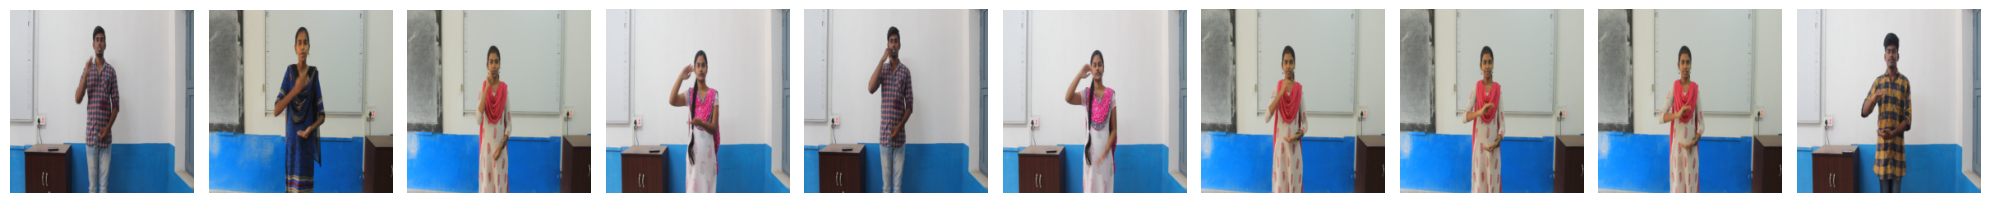


📦 Sample 2
🎯 Ground Truth: 79. short
🤖 Prediction  : 79. short
🖼️ Displaying frames...


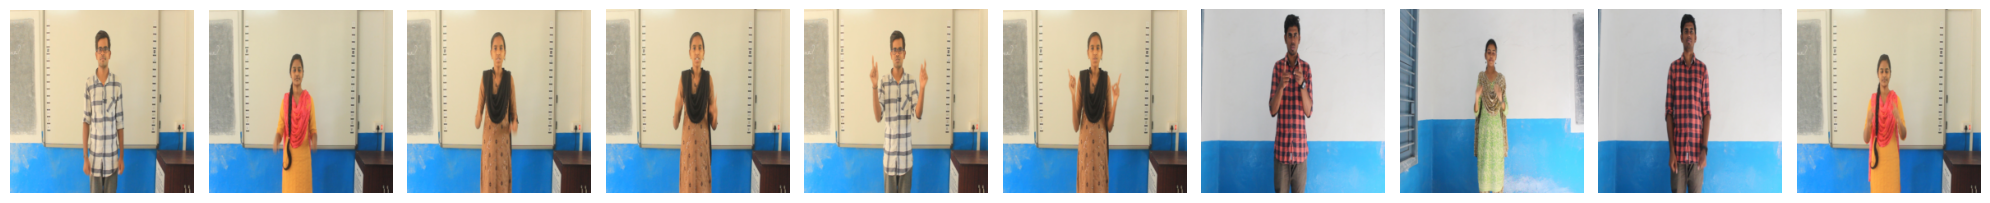


📦 Sample 3
🎯 Ground Truth: 89. warm
🤖 Prediction  : 89. warm
🖼️ Displaying frames...


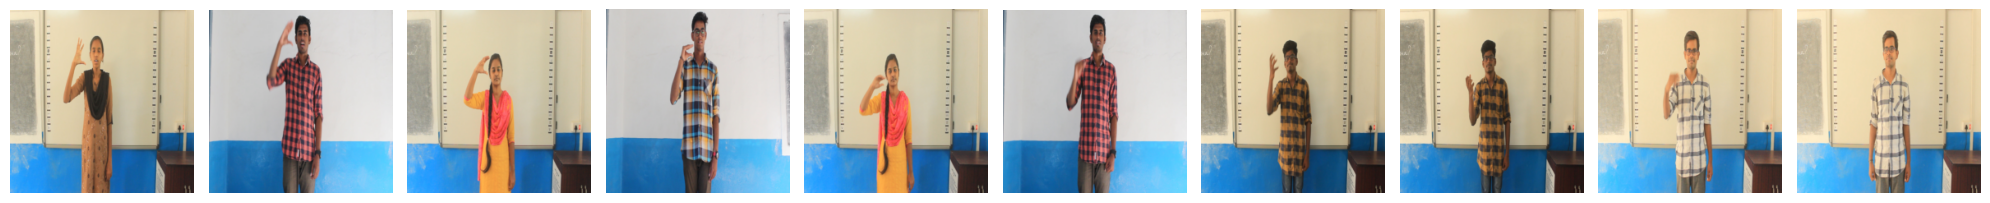


📦 Sample 4
🎯 Ground Truth: 84. small little
🤖 Prediction  : 84. small little
🖼️ Displaying frames...


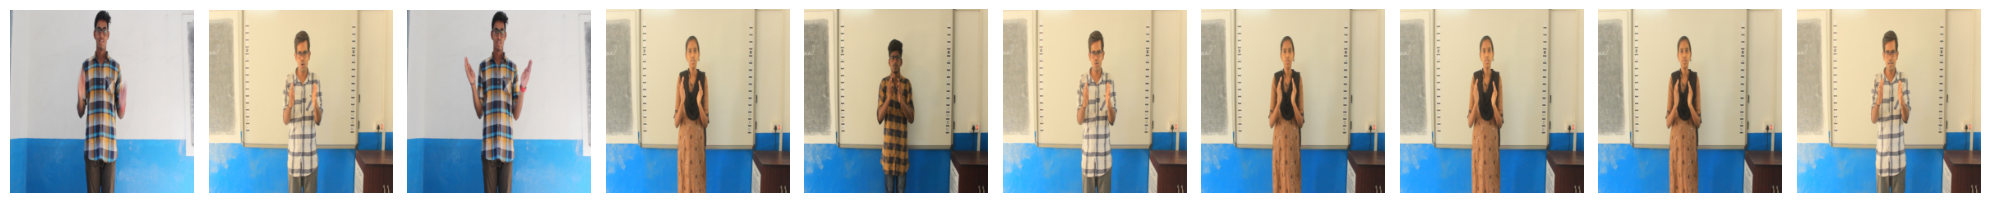


📦 Sample 5
🎯 Ground Truth: 21. tight
🤖 Prediction  : 21. tight
🖼️ Displaying frames...


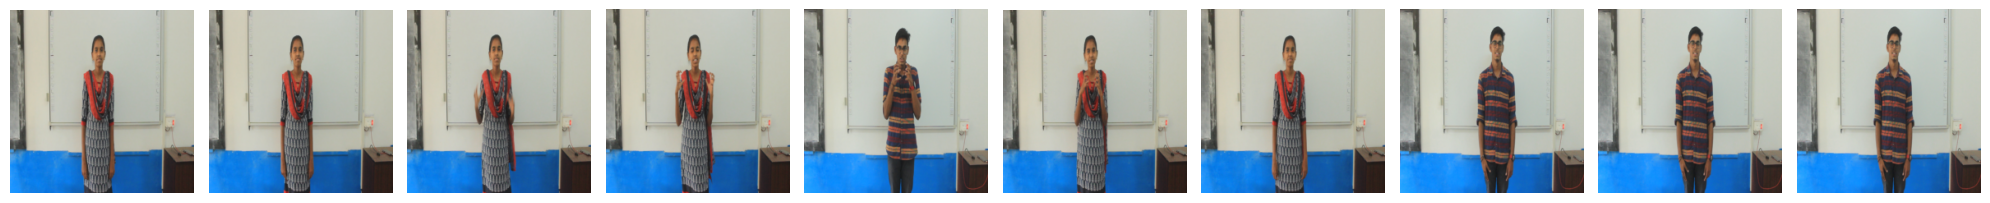

In [22]:
import torch
import random
import matplotlib.pyplot as plt

# Load best model
model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))
model.eval().to(device)

# Reverse label map
idx_to_label = {v: k for k, v in adjective_labels.items()}

# Pick 5 random samples from the test dataset
samples = random.sample(range(len(test_dataset)), 5)

for i, idx in enumerate(samples):
    video_tensor, true_label = test_dataset[idx]
    video_tensor = video_tensor.unsqueeze(0).to(device)  # Add batch dim

    with torch.no_grad():
        output = model(video_tensor)
        predicted_label = torch.argmax(output, dim=1).item()

    true_name = idx_to_label[true_label.item()]
    pred_name = idx_to_label[predicted_label]

    print(f"\n📦 Sample {i+1}")
    print(f"🎯 Ground Truth: {true_name}")
    print(f"🤖 Prediction  : {pred_name}")
    print("🖼️ Displaying frames...")

    # Plot all 10 frames
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for j, ax in enumerate(axes):
        frame = video_tensor[0][j].cpu().permute(1, 2, 0).numpy()
        frame = (frame * 0.5 + 0.5).clip(0, 1)  # De-normalize
        ax.imshow(frame)
        ax.axis("off")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_31/2729022722.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))


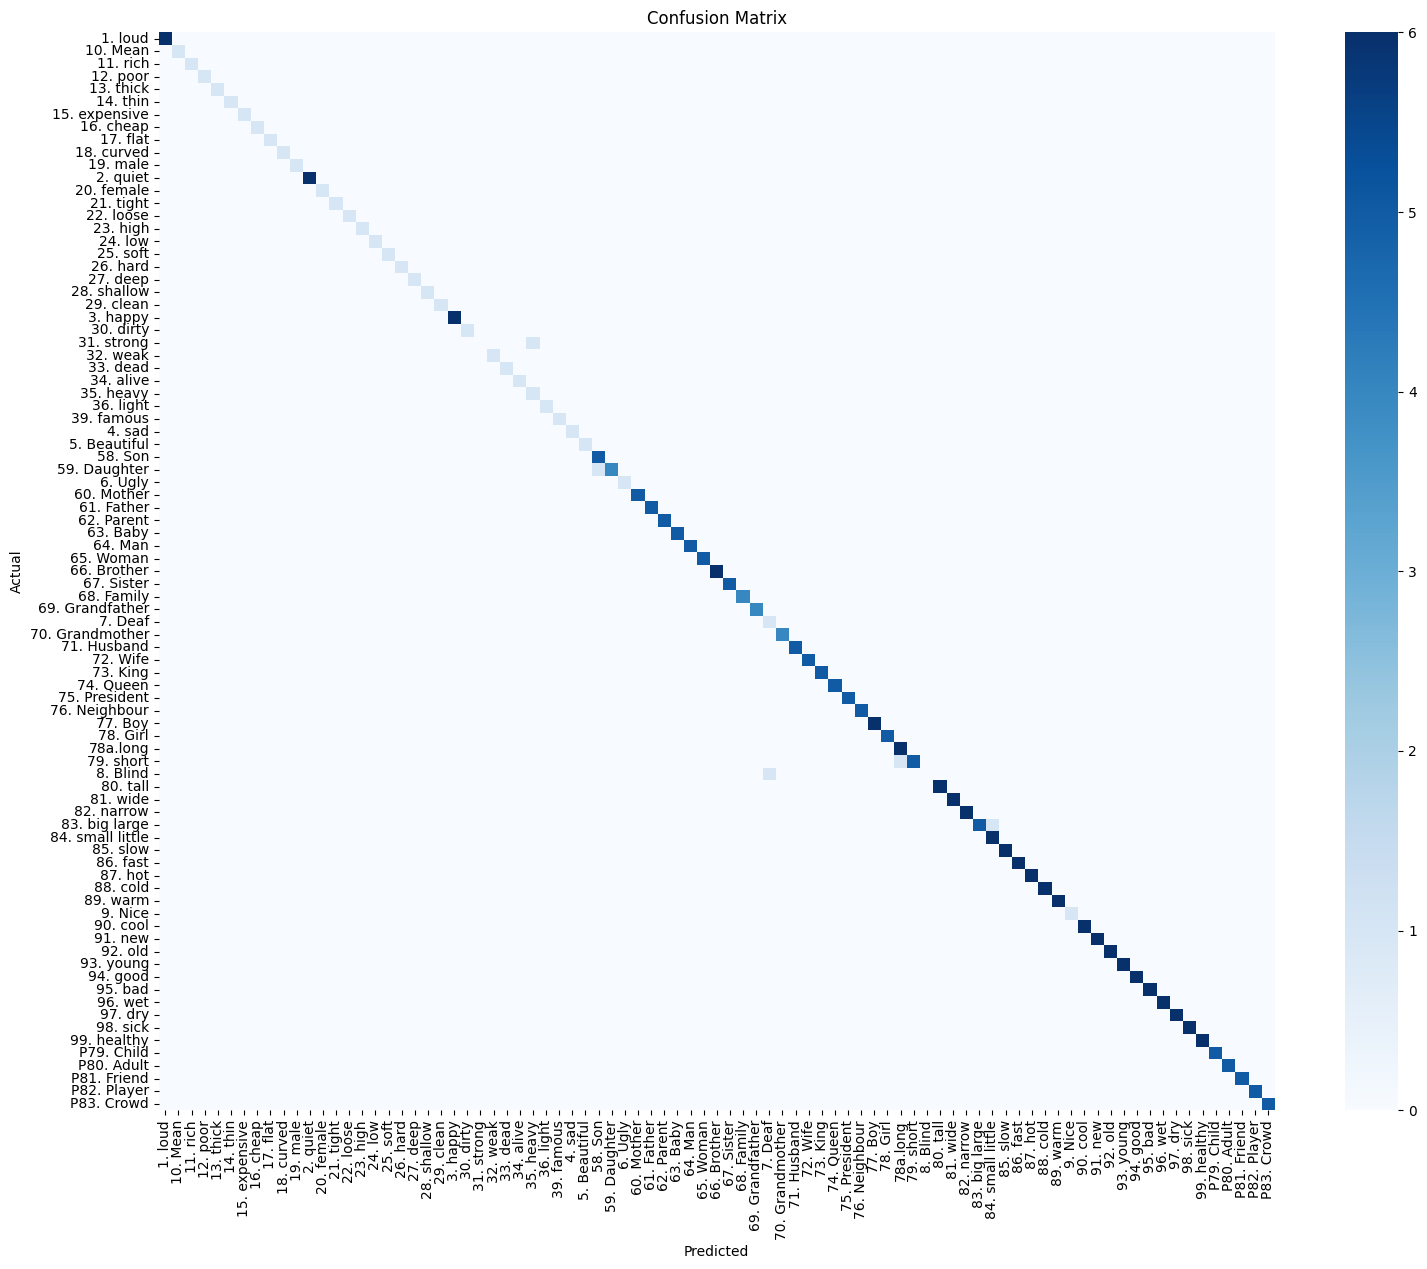

In [23]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load best model
model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))
model.eval()

# Get all predictions and labels
all_preds = []
all_labels = []

with torch.no_grad():
    for videos, labels in test_loader:
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = list(adjective_labels.keys())

plt.figure(figsize=(18, 14))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


- Model shortcomings

/tmp/ipykernel_31/2377725395.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))



❌ Sample 1: Predicted = 35. heavy, Actual = 31. strong


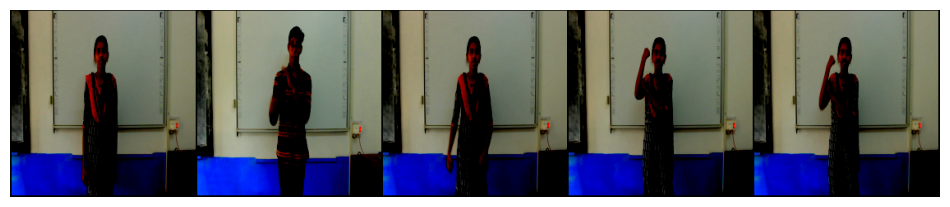


❌ Sample 2: Predicted = 58. Son, Actual = 59. Daughter


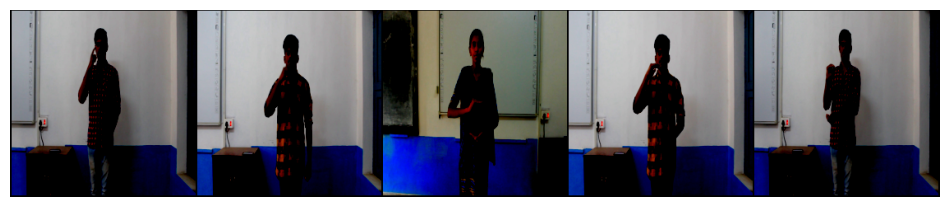


❌ Sample 3: Predicted = 7. Deaf, Actual = 8. Blind


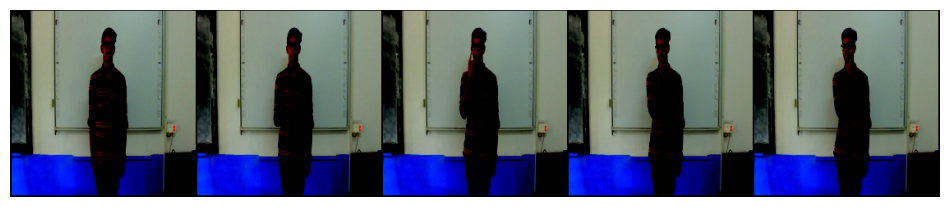


❌ Sample 4: Predicted = 84. small little, Actual = 83. big large


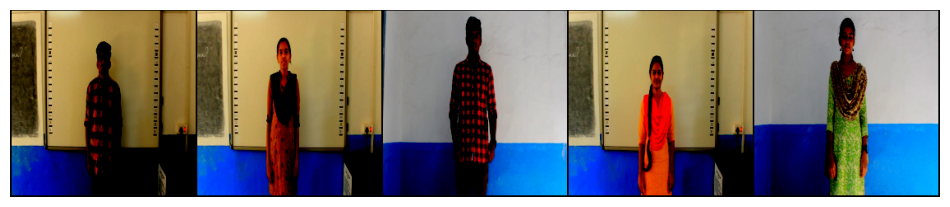


❌ Sample 5: Predicted = 78a.long, Actual = 79. short


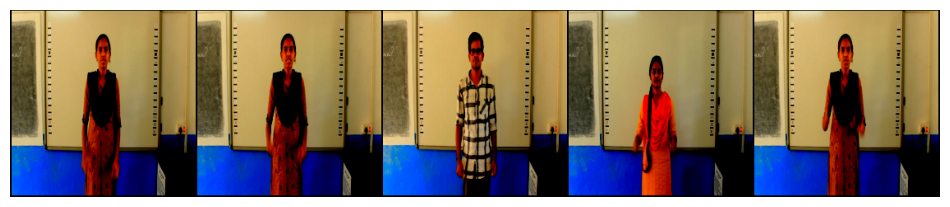

In [24]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Re-load model in eval mode
model.load_state_dict(torch.load("/kaggle/working/best_model.pth"))
model.eval()

# Mapping from index to class label
idx_to_label = {v: k for k, v in adjective_labels.items()}

misclassified = []

with torch.no_grad():
    for videos, labels in test_loader:
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        _, preds = torch.max(outputs, 1)

        for i in range(videos.size(0)):
            if preds[i] != labels[i]:
                misclassified.append((videos[i], preds[i].item(), labels[i].item()))
            if len(misclassified) >= 5:
                break
        if len(misclassified) >= 5:
            break

# Display misclassified frames
for i, (video_tensor, pred_idx, true_idx) in enumerate(misclassified):
    print(f"\n❌ Sample {i+1}: Predicted = {idx_to_label[pred_idx]}, Actual = {idx_to_label[true_idx]}")
    grid = make_grid(video_tensor[:5], nrow=5)  # Display 5 frames
    plt.figure(figsize=(12, 3))
    plt.imshow(grid.permute(1, 2, 0).cpu())
    plt.axis("off")
    plt.show()
